In [71]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model

In [25]:
height = np.loadtxt(str(os.path.dirname(os.getcwd())+ '/Data/B4/heights_1.txt'), delimiter=',')
weight = np.loadtxt(str(os.path.dirname(os.getcwd())+ '/Data/B4/weights_1.txt'), delimiter=',')
height = height * 0.0254
weight = weight * 0.453592

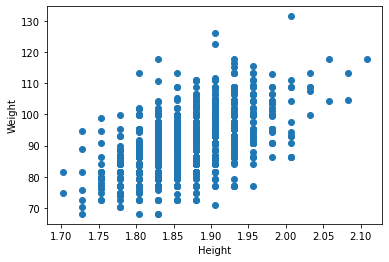

In [37]:
plt.scatter(x= height, y=weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [38]:
# Cach 1: Dung pesudo inverse

In [39]:
h = height.reshape(-1,1)
h

array([[1.8796],
       [1.8796],
       [1.8288],
       ...,
       [1.905 ],
       [1.905 ],
       [1.8542]])

In [41]:
one = np.ones((h.shape[0],1))
A = np.concatenate((h,one), axis=1)
A

array([[1.8796, 1.    ],
       [1.8796, 1.    ],
       [1.8288, 1.    ],
       ...,
       [1.905 , 1.    ],
       [1.905 , 1.    ],
       [1.8542, 1.    ]])

In [42]:
b = weight

In [43]:
# Giai bai toan Ax = b
x = np.linalg.pinv(A) @ b
x

array([ 85.42051044, -68.55285156])

In [78]:
print('Regression line by Pseudo Inverse : Weights = %.4f + %.4f * Height' %(x[1], x[0]))

Regression line by Pseudo Inverse : Weights = -68.5529 + 85.4205 * Height


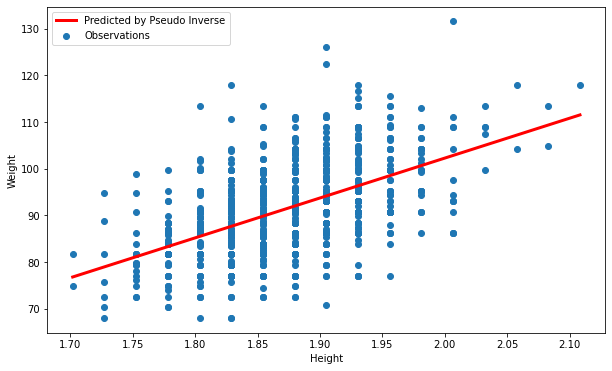

In [110]:
# Visualize Regression line
x_visual = np.linspace(min(height), max(height),50)
y_predicted = x[1] + x[0]*x_visual

plt.figure(figsize=(10,6))
plt.scatter(x= height, y=weight, label= 'Observations')
plt.plot(x_visual, y_predicted, '-', color='r', linewidth=3, label='Predicted by Pseudo Inverse')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [75]:
# Cach 2: Dung sklearn linear_regression
regr = linear_model.LinearRegression()
regr.fit(h, weight)

LinearRegression()

In [79]:
print('Regression line by Sklearn Linear Regression: Weights = %.4f + %.4f * Height' %(regr.intercept_, regr.coef_))

Regression line by Sklearn Linear Regression: Weights = -68.5529 + 85.4205 * Height


In [80]:
# Compare to Pseudo Inverse:
print('Regression line by Pseudo Inverse : Weights = %.4f + %.4f * Height' %(x[1], x[0]))

Regression line by Pseudo Inverse : Weights = -68.5529 + 85.4205 * Height


In [81]:
# Cach 3: Dung Gradient Descent cua Thay Te
def gradient_descent_2(alpha, x, y, numIterations):
    M     = x.shape[0] # number of samples
    theta = np.ones(2)
    x_T   = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss       = hypothesis - y
        # J          = np.sum(loss ** 2) / (2 * M)  # cost
        # print("iter %s | J: %.3f" % (iter, J))      
        gradient   = np.dot(x_T, loss) / M      
        
        theta    = theta - (alpha * gradient)  # update
    return theta

In [98]:
theta = gradient_descent_2(0.1, A, b, 100000)
theta

array([ 85.39804158, -68.51076397])

In [99]:
print('Regression line by Pseudo Inverse : Weights = %.4f + %.4f * Height' %(theta[1], theta[0]))

Regression line by Pseudo Inverse : Weights = -68.5108 + 85.3980 * Height


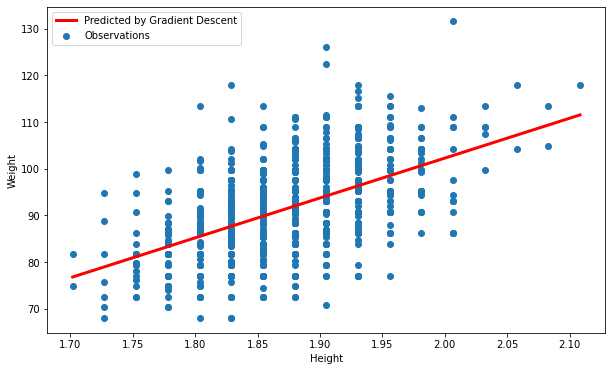

In [108]:
x_visual2 = np.linspace(min(height), max(height),50)
y_predicted2 = theta[1] + theta[0]*x_visual

plt.figure(figsize=(10,6))
plt.scatter(x= height, y=weight, label= 'Observations')
plt.plot(x_visual2, y_predicted2, '-', color='r', linewidth=3, label='Predicted by Gradient Descent')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

In [123]:
# Compare result of 3 methods:
print('Regression line by Pseudo Inverse: \t \t  Weights = %.4f + %.4f * Height' %(x[1], x[0]))
print('Regression line by Sklearn Linear Regression: \t  Weights = %.4f + %.4f * Height' %(regr.intercept_, regr.coef_))
print('Regression line by Gradient Descent: \t \t  Weights = %.4f + %.4f * Height' %(theta[1], theta[0]))

Regression line by Pseudo Inverse: 	 	  Weights = -68.5529 + 85.4205 * Height
Regression line by Sklearn Linear Regression: 	  Weights = -68.5529 + 85.4205 * Height
Regression line by Gradient Descent: 	 	  Weights = -68.5108 + 85.3980 * Height


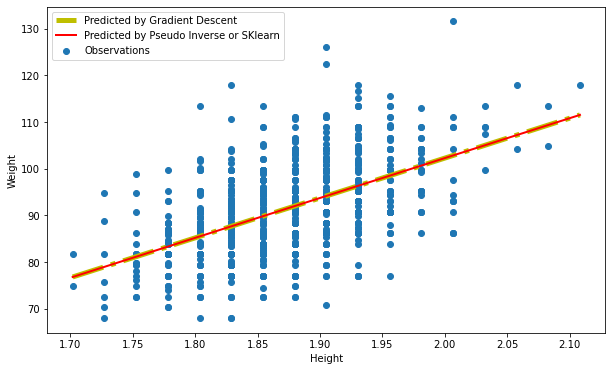

In [117]:
plt.figure(figsize=(10,6))
plt.scatter(x= height, y=weight, label= 'Observations')

plt.plot(x_visual2, y_predicted2, '-.', color='y', linewidth=5, label='Predicted by Gradient Descent')
plt.plot(x_visual, y_predicted, '-', color='r', linewidth=2, label='Predicted by Pseudo Inverse or SKlearn')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()